# Na analysis (run 37**)

# Notebook configuration

In [7]:
outputfolder  = "plots/"
save_plots    = False
inputfilename = "/Users/Gonzalo/github/NEXTdata/Na22/dst_37*.root.h5"

In [8]:
from __future__ import print_function, division

import os
import functools
import textwrap
import time
import glob
print("Running on ", time.asctime())

import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
import invisible_cities.reco.dst_functions  as dstf

pi = np.pi

coref = fitf

Running on  Mon Apr 24 16:57:22 2017


#### General plotting options

In [9]:
%matplotlib inline

plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"
XR1Opt  = "k"
XR2Opt  = "c"

if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

#### Useful functions

In [10]:
def labels(xlabel, ylabel):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist(*args, **kwargs)


def doublehist(data1, data2, lbls, *args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    h1 = plt.hist(data1, *args, label=lbls[0], alpha=0.5, normed=True, **kwargs)
    h2 = plt.hist(data2, *args, label=lbls[1], alpha=0.5, normed=True, **kwargs)
    return h1, h2, plt.legend()

    
def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist2d(*args, **kwargs)

    
def pdf(data, *args, **kwargs):
    """
    Create a normalized histogram with appropiate range.
    """
    data = np.array(data)
    h = hist(data, *args, **kwargs, weights=np.ones_like(data)/len(data))
    plt.yscale("log")
    plt.ylim(1e-4, 1.)
    return h
    
def scatter(*args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    return plt.scatter(*args, **kwargs)


def profile_and_scatter(x, y, z, nbin, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    x, y, z, ze = fitf.profileXY(x, y, z, *nbin, *args, **kwargs)
    x_ = np.repeat(x, x.size)
    y_ = np.tile  (y, y.size)
    z_ = z.flatten()
    return (x, y, z, ze), plt.scatter(x_, y_, c=z_, marker="s"), plt.colorbar()


def doublescatter(x1, y1, x2, y2, lbls, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    sc1 = plt.scatter(x1, y1, *args, label=lbls[0], **kwargs)
    sc2 = plt.scatter(x2, y2, *args, label=lbls[1], **kwargs)
    return sc1, sc2, plt.legend()

def covariance(x, y):
    cov = np.cov(x, y)
    l, v = np.linalg.eig(cov)
    lx, ly = l**0.5
    vx, vy = v.T
    x0, y0 = np.mean(x), np.mean(y)
    x1     = lx * vx[0]
    y1     = lx * vx[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*ly, head_length=0.1*lx, fc='r', ec='r')
    x1     = ly * vy[0]
    y1     = ly * vy[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*lx, head_length=0.1*ly, fc='r', ec='r')
    return l, v

def reso(values, ene=29.6):
    _, mu, sigma = values
    r = 235. * sigma/mu
    return r, r * (ene/2458)**0.5

def gausstext(values, ene=29.6):
    return textwrap.dedent("""
        $\mu$ = {:.1f}
        $\sigma$ = {:.2f}
        R = {:.3}%
        Rbb = {:.3}%""".format(*values[1:], *reso(values, ene)))

def save_to_folder(save_plots, outputfolder, name):
    """
    Set title and save plot in folder.
    """
    plt.title(name)
    if save_plots:
        plt.savefig("{}/{}.png".format(outputfolder, name), dpi=100)

save = functools.partial(save_to_folder, save_plots, outputfolder)

### Input data

In [12]:
ifiles = glob.glob(os.path.expandvars(inputfilename))
for ifile in ifiles:
    print("ifile:", ifile)

ifile: /Users/Gonzalo/github/NEXTdata/Na22/dst_3708.root.h5
ifile: /Users/Gonzalo/github/NEXTdata/Na22/dst_3723.root.h5
ifile: /Users/Gonzalo/github/NEXTdata/Na22/dst_3732.root.h5
ifile: /Users/Gonzalo/github/NEXTdata/Na22/dst_3740.root.h5
ifile: /Users/Gonzalo/github/NEXTdata/Na22/dst_3752.root.h5
ifile: /Users/Gonzalo/github/NEXTdata/Na22/dst_3755.root.h5


# Read data

In [13]:
full = dstf.load_dsts(ifiles, "DST", "Events")
full.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,40,1.492560e+09,0,2,250.0,75.073570,408.960644,191600.0,79.048687,4190.846680,...,666587.5,24,474.9875,474.9875,-132.555549,54.893539,143.472207,2.748976,12.056701,10.918101
1,40,1.492560e+09,1,2,250.0,75.073570,408.960644,191600.0,23.035625,26082.117188,...,905887.5,73,714.2875,714.2875,-157.760298,104.002187,188.957049,2.558748,16.932276,15.889456
2,41,1.492560e+09,0,2,125.0,13.553119,62.422323,193625.0,15.967875,16142.695312,...,658387.5,54,464.7625,464.7625,-198.110339,-48.160298,203.880163,-2.903120,12.582884,15.668481
3,41,1.492560e+09,1,2,125.0,13.553119,62.422323,193625.0,15.936875,2381.542725,...,741237.5,9,547.6125,547.6125,-44.743445,84.210207,95.358979,2.059193,7.562538,7.474337
4,198,1.492563e+09,0,4,225.0,45.016495,246.910500,202125.0,5.807437,1706.671509,...,313587.5,3,111.4625,111.4625,10.841085,-157.464095,157.836848,-1.502057,4.945256,4.323629


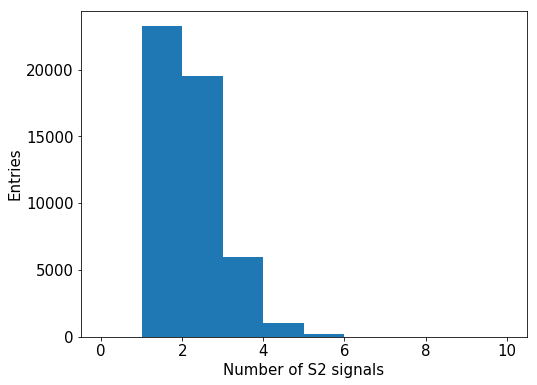

In [14]:
hist(full.nS2, 10, (0,10))
labels("Number of S2 signals", "Entries")

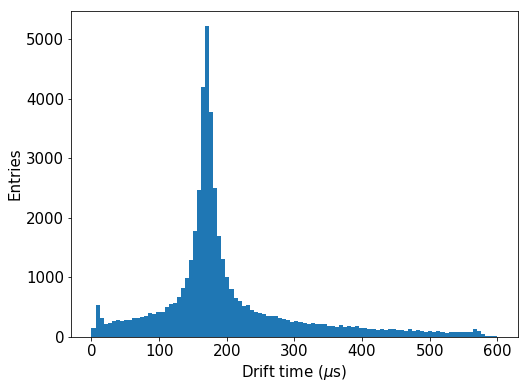

In [15]:
hist(full.Z, 100, (0,600))
labels("Drift time ($\mu$s)", "Entries")

In [16]:
XRrange = 2e3, 15e3
PErange = 8e4, 13e4
7000/41.5*511

86192.77108433735

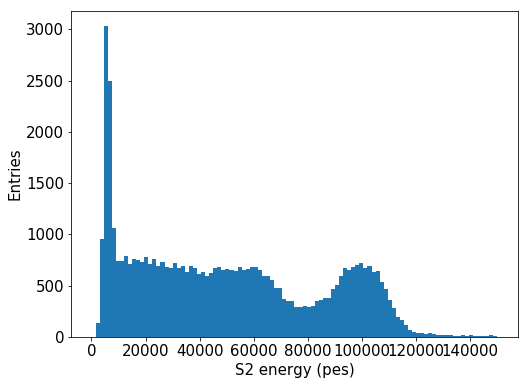

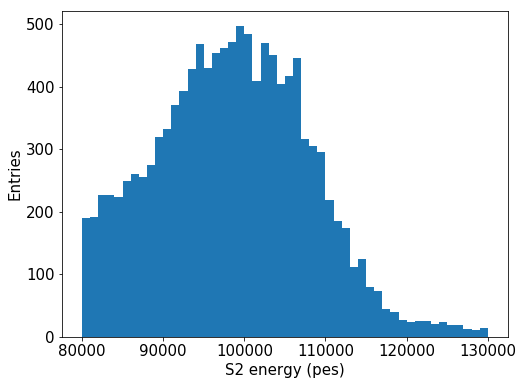

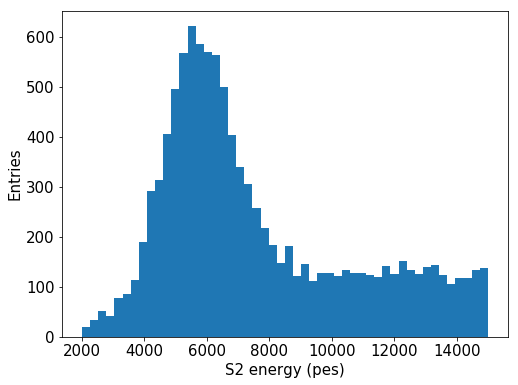

In [17]:
hist(full.S2e, 100, (0,15e4))
labels("S2 energy (pes)", "Entries")

hist(full.S2e, 50, PErange)
labels("S2 energy (pes)", "Entries")

hist(full.S2e, 50, XRrange)
labels("S2 energy (pes)", "Entries")

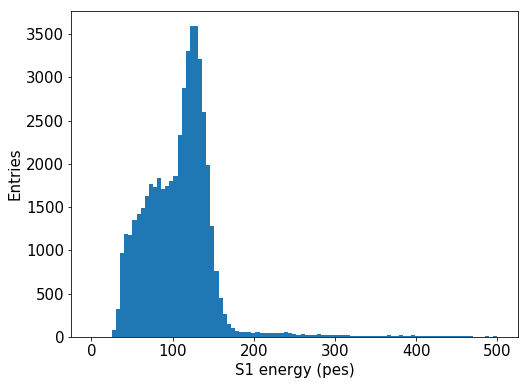

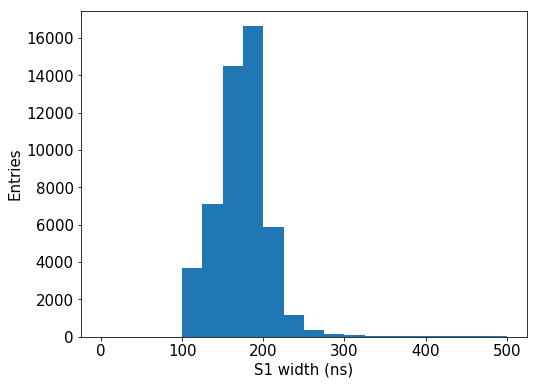

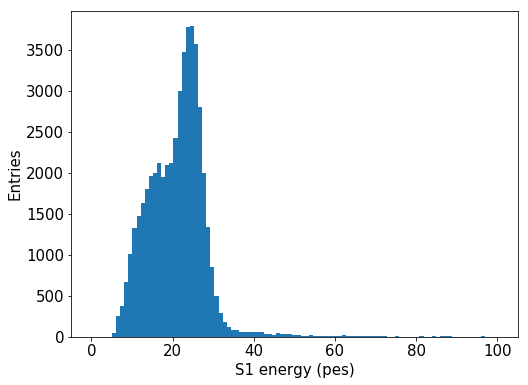

In [18]:
bins = np.linspace(0, 500, 100)
hist(full.S1e, bins)
labels("S1 energy (pes)", "Entries")

bins = np.linspace(0, 500, 21)
hist(full.S1w, bins)
labels("S1 width (ns)", "Entries")

bins = np.linspace(0, 100, 100)
hist(full.S1h, bins)
labels("S1 energy (pes)", "Entries")

# S2 energy vs Z

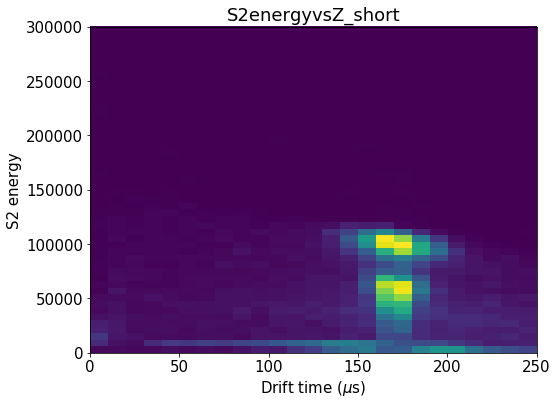

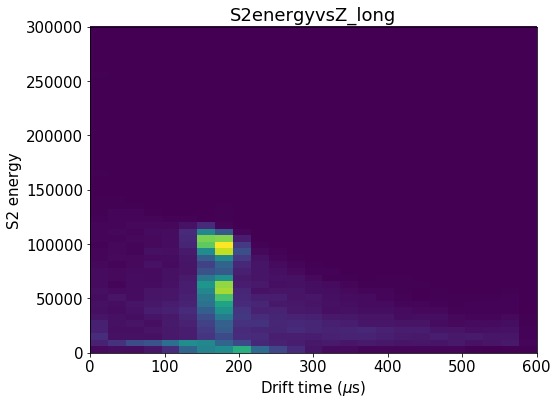

In [19]:
zrange = 0, 250
Erange = 0, 3e5
hist2d(full.Z, full.S2e, (25, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ_short")

zrange = 0, 600
Erange = 0, 3e5
hist2d(full.Z, full.S2e, (25,  50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ_long")

# Short drift time: Z < 300 $\mu$s

In [20]:
zfid   = 0, 600
shortZ = full[coref.in_range(full.Z, *zfid)]
print("Ratio:", len(shortZ)/len(full))
shortZ.head()

Ratio: 0.9690855645983723


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,40,1.492560e+09,0,2,250.0,75.073570,408.960644,191600.0,79.048687,4190.846680,...,666587.5,24,474.9875,474.9875,-132.555549,54.893539,143.472207,2.748976,12.056701,10.918101
2,41,1.492560e+09,0,2,125.0,13.553119,62.422323,193625.0,15.967875,16142.695312,...,658387.5,54,464.7625,464.7625,-198.110339,-48.160298,203.880163,-2.903120,12.582884,15.668481
3,41,1.492560e+09,1,2,125.0,13.553119,62.422323,193625.0,15.936875,2381.542725,...,741237.5,9,547.6125,547.6125,-44.743445,84.210207,95.358979,2.059193,7.562538,7.474337
4,198,1.492563e+09,0,4,225.0,45.016495,246.910500,202125.0,5.807437,1706.671509,...,313587.5,3,111.4625,111.4625,10.841085,-157.464095,157.836848,-1.502057,4.945256,4.323629
5,198,1.492563e+09,1,4,225.0,45.016495,246.910500,202125.0,9.561656,3144.795166,...,362712.5,8,160.5875,160.5875,14.892451,-126.667248,127.539707,-1.453762,6.724233,7.120924


# S1 energy

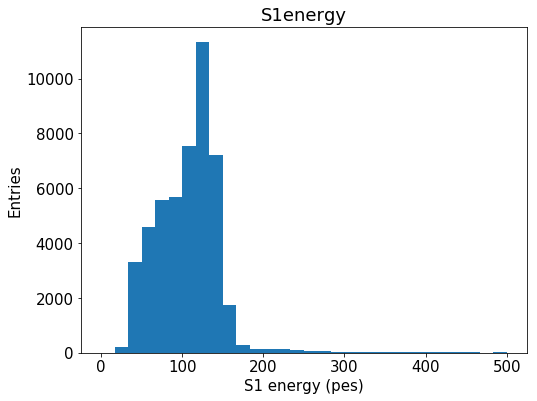

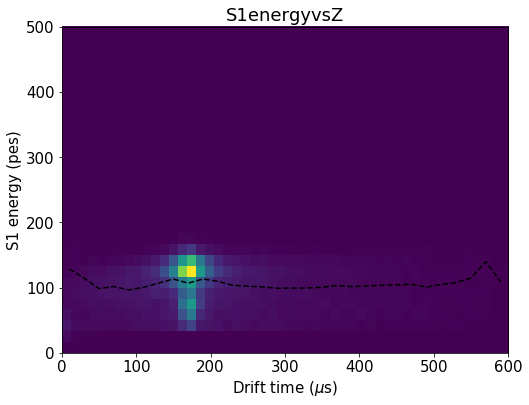

In [21]:
zrange = zfid
Srange = 0, 500

hist(shortZ.S1e, 30, range=Srange)
labels("S1 energy (pes)", "Entries")
save("S1energy")

hist2d(shortZ.Z, shortZ.S1e, (50, 30), range=(zrange, Srange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S1e, 30, xrange=zrange, yrange=Srange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1energyvsZ")

# S1 width

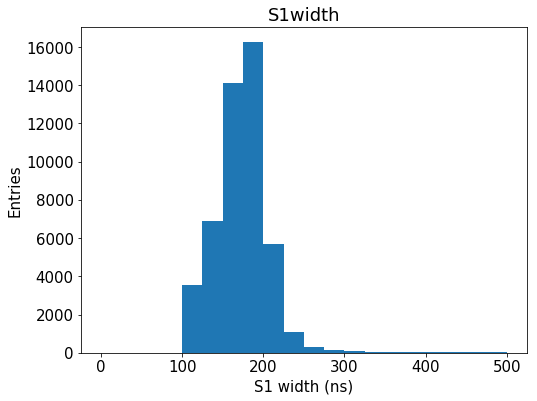

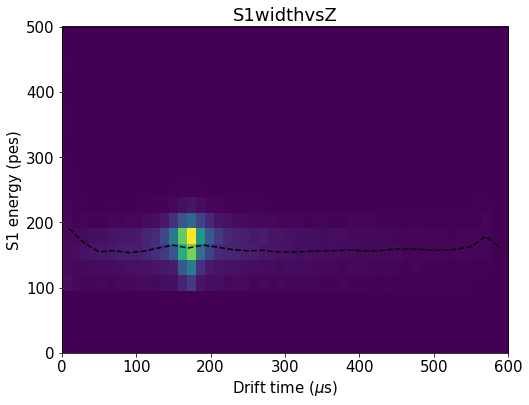

In [22]:
zrange = zfid
wrange = 0, 500

hist(shortZ.S1w, np.linspace(*wrange, 21))
labels("S1 width (ns)", "Entries")
save("S1width")

hist2d(shortZ.Z, shortZ.S1w, (50, 21), range=(zrange, wrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S1w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1widthvsZ")

# S1 height

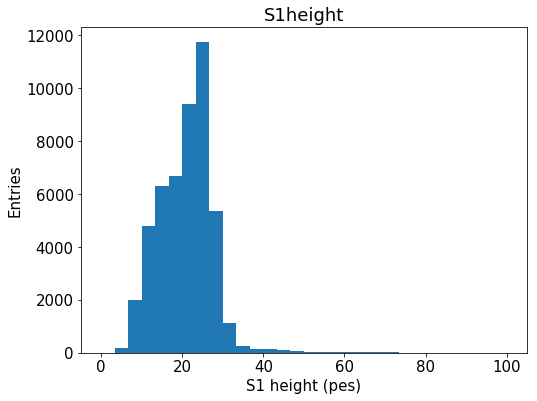

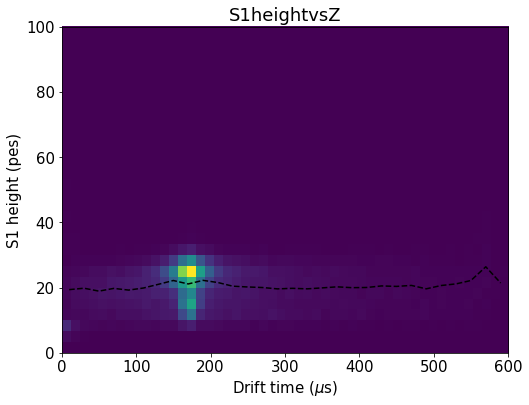

In [23]:
zrange = zfid
hrange = 0, 100

hist(shortZ.S1h, 30, range=hrange)
labels("S1 height (pes)", "Entries")
save("S1height")

hist2d(shortZ.Z, shortZ.S1h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S1h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 height (pes)")
save("S1heightvsZ")

# S1 peak to area ratio

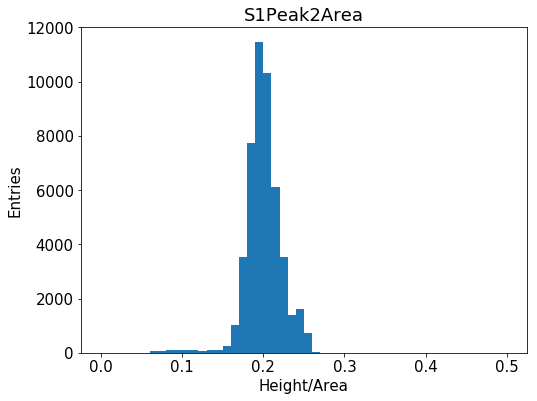

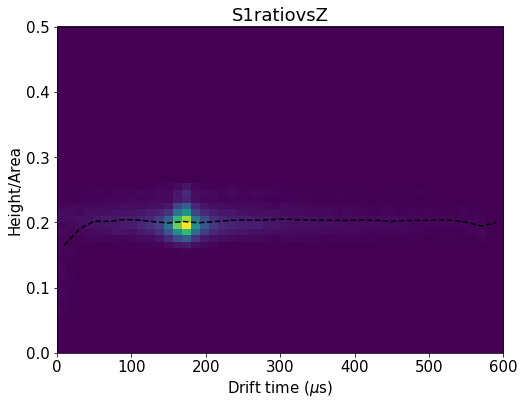

In [24]:
zrange = zfid
rrange = 0, 0.5

S1r = shortZ.S1h/shortZ.S1e
hist(S1r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S1Peak2Area")

hist2d(shortZ.Z, S1r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(shortZ.Z, S1r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S1ratiovsZ")

# S2 energy

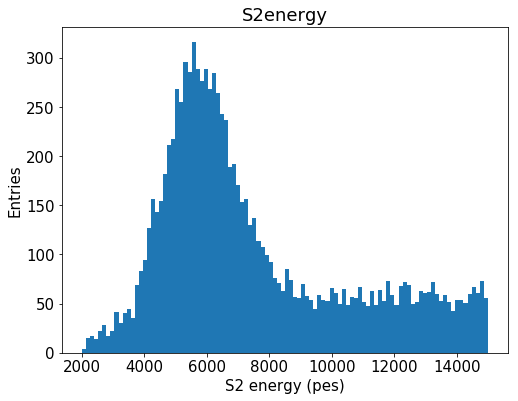

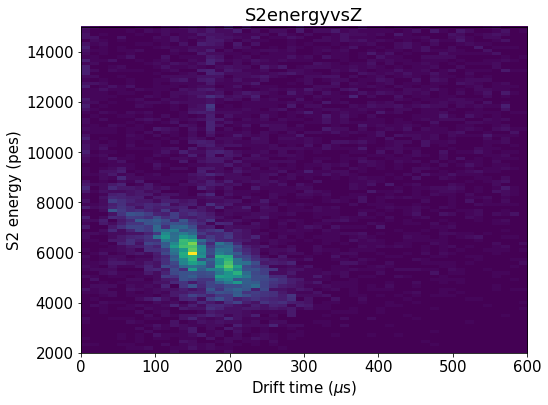

In [25]:
zrange = zfid
Erange = XRrange

hist(shortZ.S2e, 100, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy")

hist2d(shortZ.Z, shortZ.S2e, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.Z * 1e-3, shortZ.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

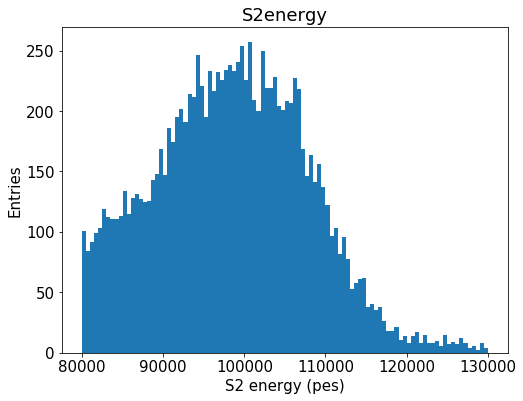

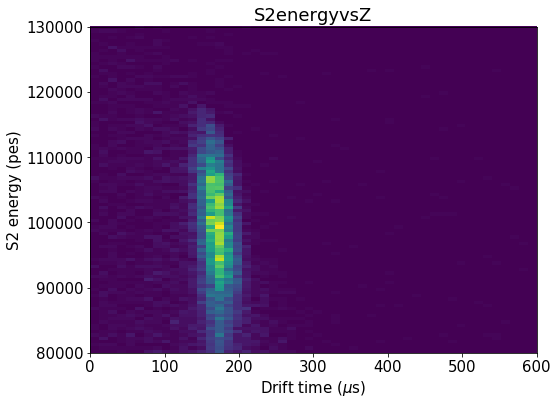

In [26]:
zrange = zfid
Erange = PErange

hist(shortZ.S2e, 100, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy")

hist2d(shortZ.Z, shortZ.S2e, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.Z * 1e-3, shortZ.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

# S2 width

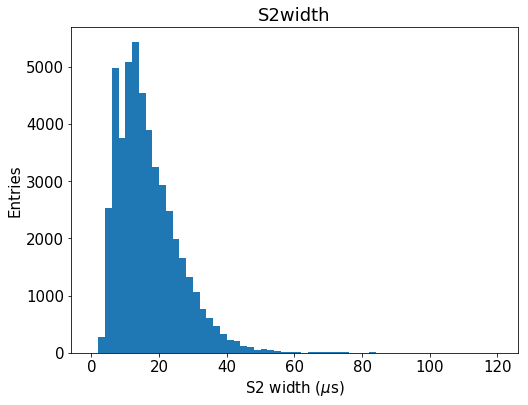

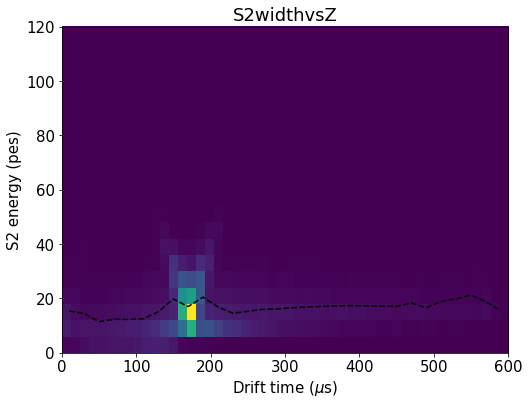

In [27]:
zrange = zfid
wrange = 0, 120

hist(shortZ.S2w, 60, range=wrange)
labels("S2 width ($\mu$s)", "Entries")
save("S2width")

hist2d(shortZ.Z, shortZ.S2w, (50, 20), range=(zrange, wrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2widthvsZ")

# S2 height

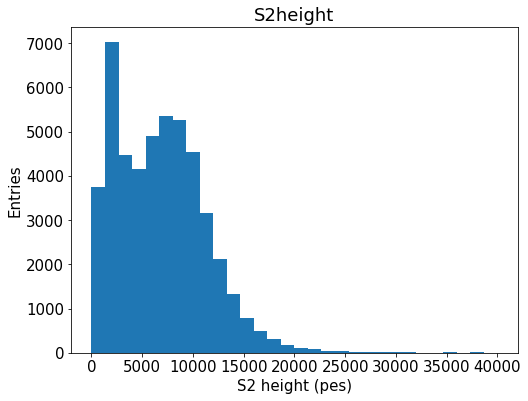

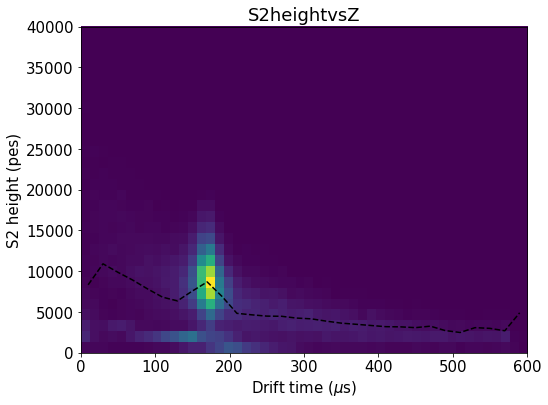

In [28]:
zrange = zfid
hrange = 0, 4e4

hist(shortZ.S2h, 30, range=hrange)
labels("S2 height (pes)", "Entries")
save("S2height")

hist2d(shortZ.Z, shortZ.S2h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 height (pes)")
save("S2heightvsZ")

# S2 peak to area ratio

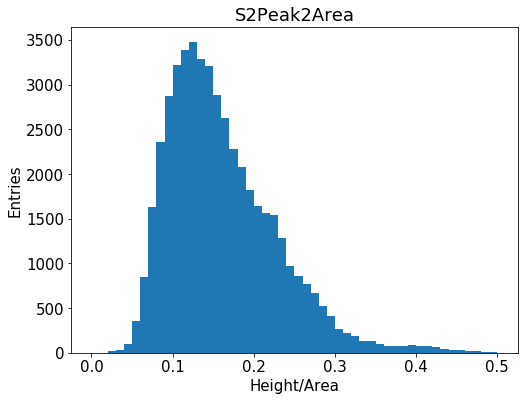

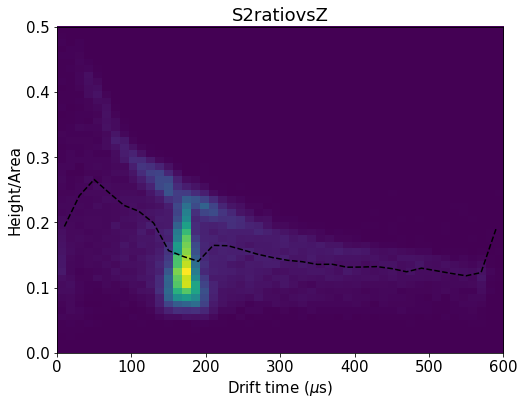

In [29]:
zrange = zfid
rrange = 0, 0.5

S2r = shortZ.S2h/shortZ.S2e

hist(S2r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S2Peak2Area")

hist2d(shortZ.Z, S2r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(shortZ.Z, S2r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S2ratiovsZ")

# S2 vs S1

[  1.58300777e+03   1.31954534e+09] [[ -9.99999954e-01  -3.04090555e-04]
 [  3.04090555e-04  -9.99999954e-01]]


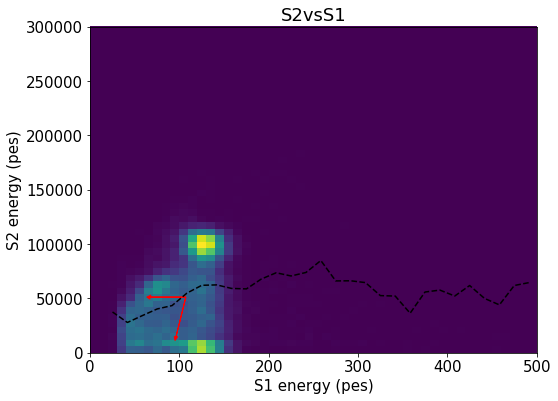

In [30]:
Srange = 0, 500
Erange = 0, 3e5

S = shortZ.S1e
E = shortZ.S2e

hist2d(S, E, (50, 50), range=(Srange, Erange))
x, y, _ = fitf.profileX(S, E, 30, xrange=Srange, yrange=Erange)
plt.plot(x, y, profOpt)

sel = fitf.in_range(S, *Srange) & coref.in_range(E, *Erange)
c = covariance(S[sel], E[sel])
print(*c)
labels("S1 energy (pes)", "S2 energy (pes)")
save("S2vsS1")

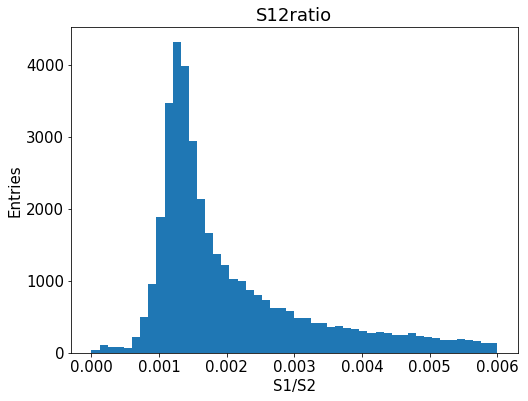

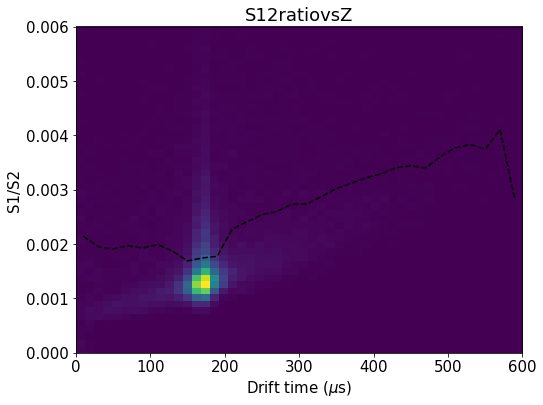

In [31]:
zrange = zfid
Rrange = 0, 0.006

S12r = shortZ.S1e/shortZ.S2e

hist(S12r, 50, range=Rrange)
labels("S1/S2", "Entries")
save("S12ratio")

hist2d(shortZ.Z, S12r, (50, 50), range=(zrange, Rrange))
x, y, _ = fitf.profileX(shortZ.Z, S12r, 30, xrange=zrange, yrange=Rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1/S2")
save("S12ratiovsZ")

# X-rays

In [32]:
XRrange = 2e3, 15e3
XR = shortZ[coref.in_range(shortZ.S2e, 4000, 8000)]
XR.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
4,198,1.492563e+09,0,4,225.0,45.016495,246.910500,202125.0,5.807437,1706.671509,...,313587.5,3,111.4625,111.4625,10.841085,-157.464095,157.836848,-1.502057,4.945256,4.323629
13,542,1.492570e+09,1,2,100.0,91.565414,294.895456,210000.0,10.760000,1089.815674,...,782562.5,6,572.5625,572.5625,-83.912512,176.201817,195.162471,2.015247,6.922986,5.944658
0,2,1.492610e+09,0,2,175.0,22.244972,122.220965,200125.0,6.702875,1491.312134,...,357062.5,3,156.9375,156.9375,91.847051,7.581373,92.159416,0.082357,4.662771,4.391581
6,10,1.492610e+09,0,2,200.0,25.412998,130.811207,200100.0,5.912094,1775.634521,...,306912.5,4,106.8125,106.8125,-151.987192,-40.684774,157.338353,-2.880039,4.598503,4.964069
9,11,1.492610e+09,1,2,175.0,29.152281,138.554706,200125.0,6.995875,1254.913696,...,414112.5,1,213.9875,213.9875,15.000000,35.000000,38.078866,1.165905,0.000000,0.000000


# Temporary fiducialization

In [33]:
XRfid = XR[(XR.R < 100)]# & coref.in_range(shortZ.Z, 0, 150)]
print("Ratio:", len(XRfid)/len(full))
print("Ratio:", len(XRfid)/len(XR))
XRfid.head()

Ratio: 0.04205243056249875
Ratio: 0.3347659980897803


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,2,1.492610e+09,0,2,175.0,22.244972,122.220965,200125.0,6.702875,1491.312134,...,357062.5,3,156.9375,156.9375,91.847051,7.581373,92.159416,0.082357,4.662771,4.391581
9,11,1.492610e+09,1,2,175.0,29.152281,138.554706,200125.0,6.995875,1254.913696,...,414112.5,1,213.9875,213.9875,15.000000,35.000000,38.078866,1.165905,0.000000,0.000000
11,12,1.492610e+09,1,2,150.0,28.538490,125.769479,200100.0,7.056500,1212.838745,...,425162.5,2,225.0625,225.0625,35.000000,-10.003157,36.401417,-0.278383,0.000000,5.039174
57,204,1.492610e+09,1,2,125.0,23.404081,101.778905,200125.0,7.906250,1606.870483,...,391637.5,4,191.5125,191.5125,-45.077017,50.844614,67.949336,2.296139,6.183058,4.942736
60,206,1.492610e+09,0,2,150.0,20.095322,100.833054,200125.0,5.943531,1938.209595,...,332862.5,3,132.7375,132.7375,-11.600539,-62.670101,63.734716,-1.753829,4.751885,4.240726


# S2 energy fiducialized

[ 8648.89118225  -484.04938384]


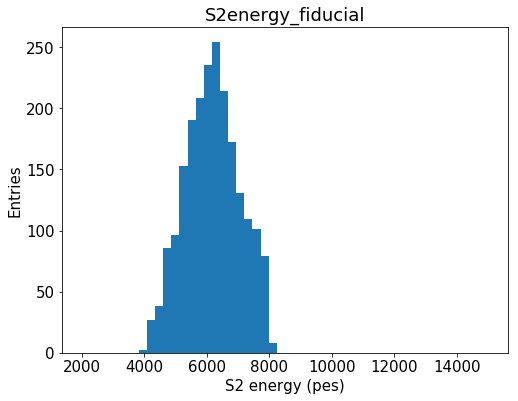

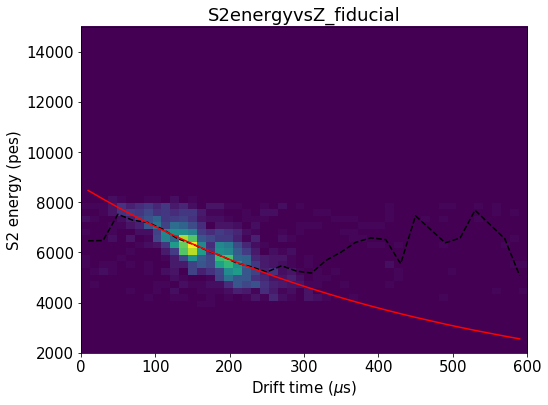

In [34]:
zrange = zfid
Erange = XRrange

hist(XRfid.S2e, 50, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy_fiducial")

hist2d(XRfid.Z, XRfid.S2e, (50, 50), range=(zrange, Erange))
x, y, _ = fitf.profileX(XRfid.Z, XRfid.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200), fit_range=(80, 250))
plt.plot(x, f.fn(x), fitOpt)
print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ_fiducial")

zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

# Correction by attachment

[  4.79856068e+05   8.36616378e+03   6.47009602e+02   3.75295346e+04
   9.96459780e+03   4.45740874e+02]
[  8501.95097399 -45607.50433634]


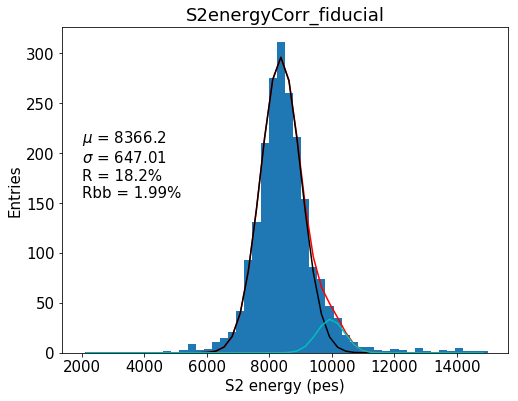

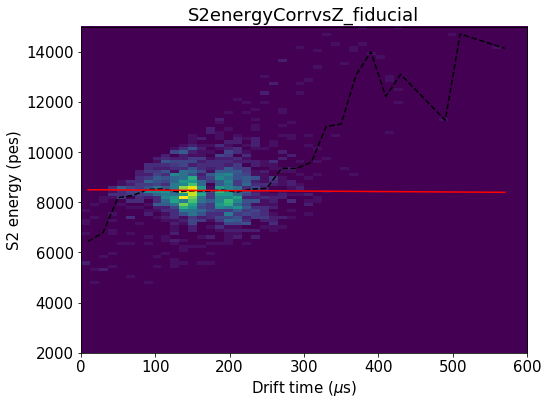

In [35]:
zrange = zfid
Erange = XRrange

E = XRfid.S2e * zcorr(XRfid.Z)

y, x, _ = hist(E, 50, range=Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3, 10000, 500
low  =  10, 7000,  50,  10,  9500, 100
upp  = 1e6, 9000, 800, 5e4, 11000, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 11000), bounds=(low, upp))
print(f.values)


plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("S2 energy (pes)", "Entries")
save("S2energyCorr_fiducial")

hist2d(XRfid.Z, E, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(XRfid.Z, E, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200), fit_range=(80, 250))
plt.plot(x, f.fn(x), fitOpt)

print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyCorrvsZ_fiducial")


In [36]:
E = XR.S2e * zcorr(XR.Z)
XR = XR[coref.in_range(E, 6e3, 10e3) & coref.in_range(XR.R, 0, 180)]

# Tracking

2.36929099609


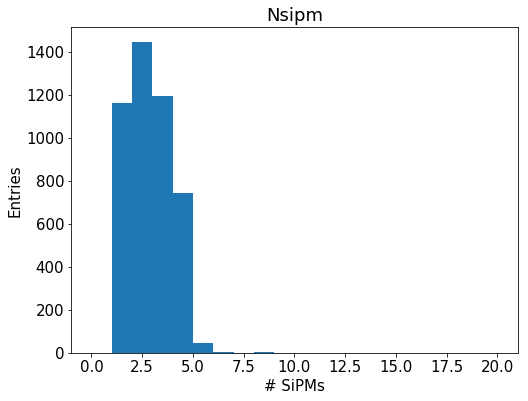

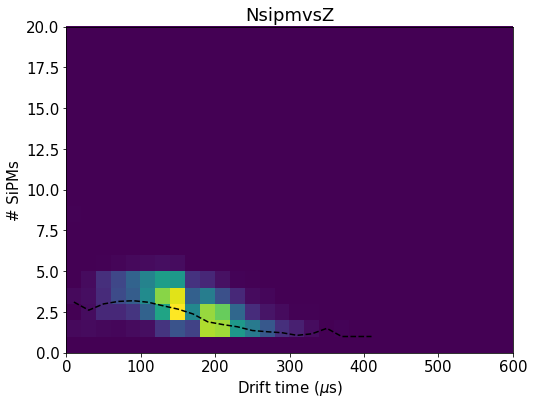

In [37]:
nrange = 0, 20
zrange = zfid

print(XR.Nsipm.mean())
hist(XR.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(XR.Z, XR.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(XR.Z, XR.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


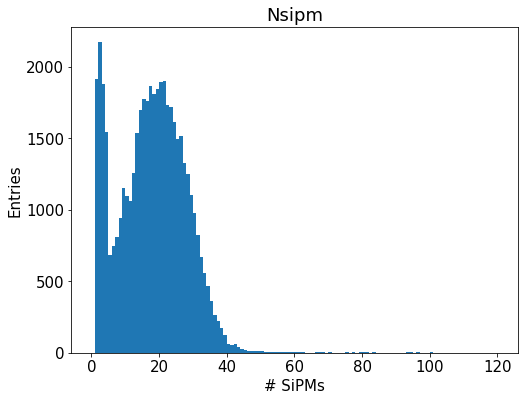

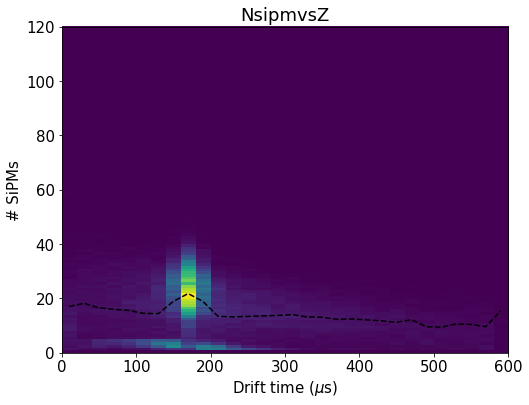

In [38]:
nrange = 0, 120
zrange = zfid

hist(shortZ.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(shortZ.Z, shortZ.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


# XR distribution

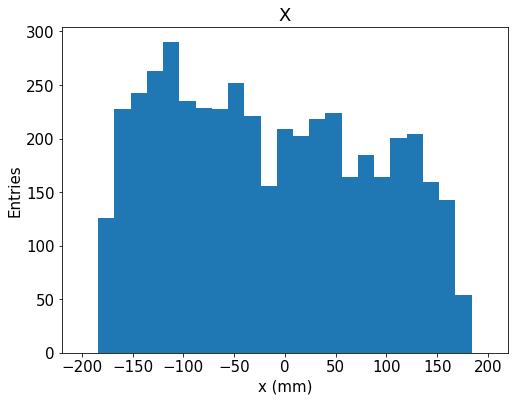

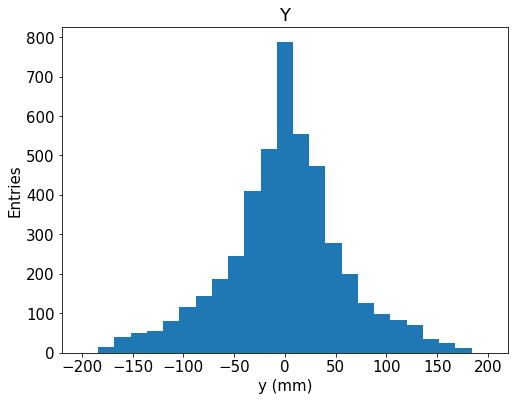

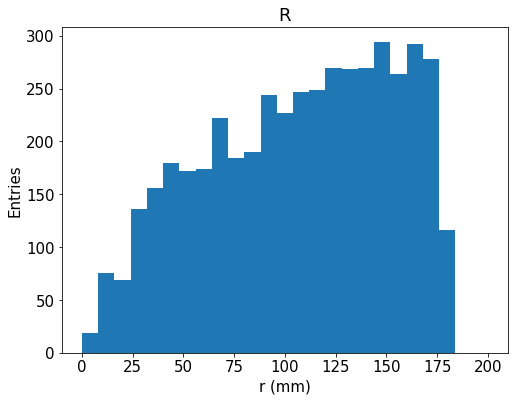

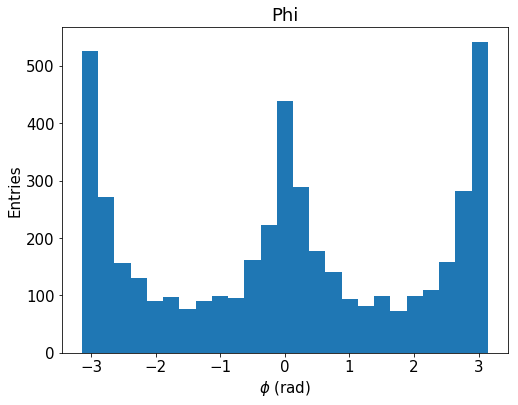

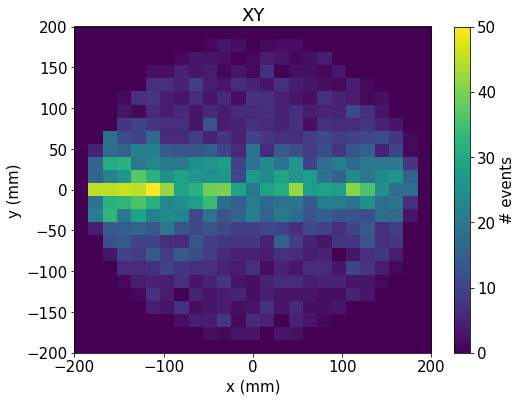

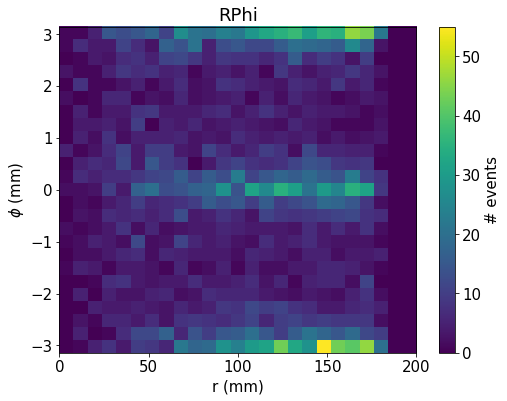

In [39]:
xrange = -200, 200
yrange = -200, 200
rrange =    0, 200
prange = - pi,  pi

hist(XR.X, 25, range=xrange)
labels("x (mm)", "Entries")
save("X")

hist(XR.Y, 25, range=yrange)
labels("y (mm)", "Entries")
save("Y")

hist(XR.R, 25, range=rrange)
labels("r (mm)", "Entries")
save("R")

hist(XR.Phi, 25, range=prange)
labels("$\phi$ (rad)", "Entries")
save("Phi")

nevts, xs, ys, _ = \
hist2d(XR.X, XR.Y, (25, 25), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")
save("XY")

hist2d(XR.R, XR.Phi, (25, 25), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

# Tracking charge

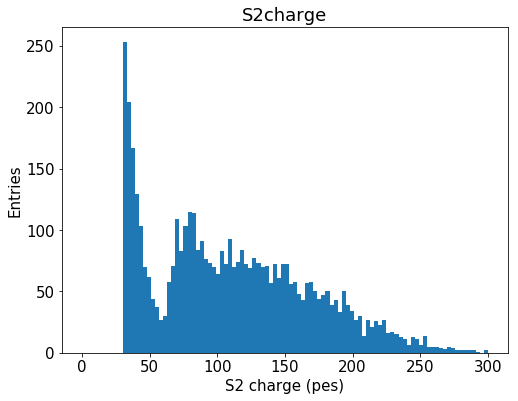

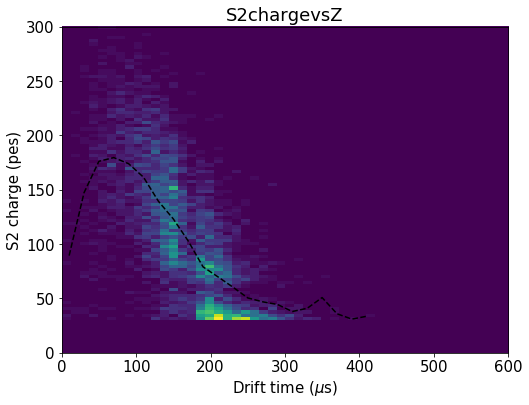

In [40]:
zrange = zfid
Qrange = 0, 300

hist(XR.S2q, 100, range=Qrange)
labels("S2 charge (pes)", "Entries")
save("S2charge")

hist2d(XR.Z, XR.S2q, (50, 100), range=(zrange, Qrange))
x, y, _ = fitf.profileX(XR.Z, XR.S2q, 30, xrange=zrange, yrange=Qrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 charge (pes)")
save("S2chargevsZ")

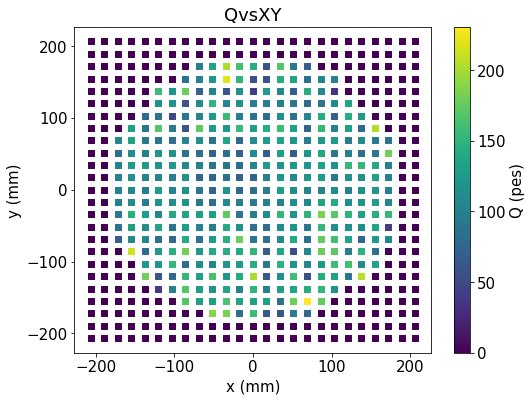

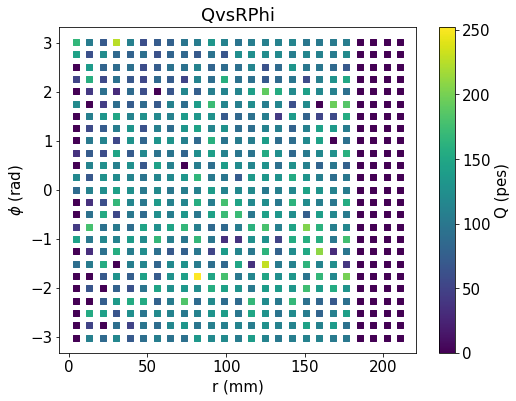

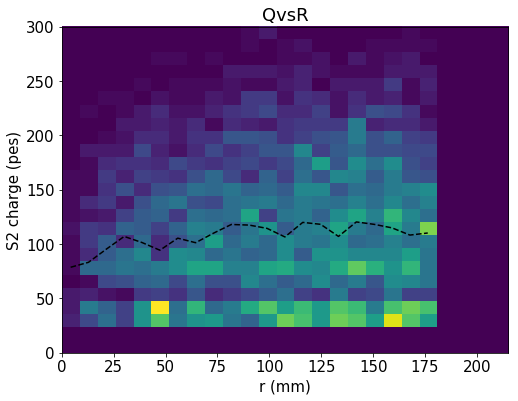

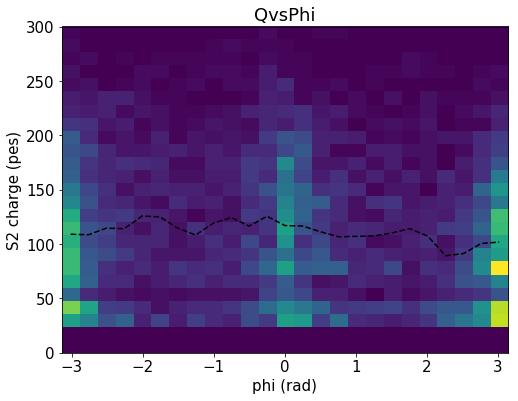

In [41]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Qrange =    0, 300

_, _, cb = profile_and_scatter(XR.X, XR.Y, XR.S2q, (25, 25), xrange=xrange, yrange=yrange)
cb.set_label("Q (pes)")
labels("x (mm)", "y (mm)")
save("QvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, XR.S2q, (25, 25), xrange=rrange, yrange=prange)
cb.set_label("Q (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("QvsRPhi")

hist2d(XR.R, XR.S2q, (25, 25), range=(rrange, Qrange))
x, y, _ = fitf.profileX(XR.R, XR.S2q, 25, xrange=rrange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 charge (pes)")
save("QvsR")

hist2d(XR.Phi, XR.S2q, (25, 25), range=(prange, Qrange))
x, y, _ = fitf.profileX(XR.Phi, XR.S2q, 25, xrange=prange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 charge (pes)")
save("QvsPhi")


# Energy vs position

8041.10478595


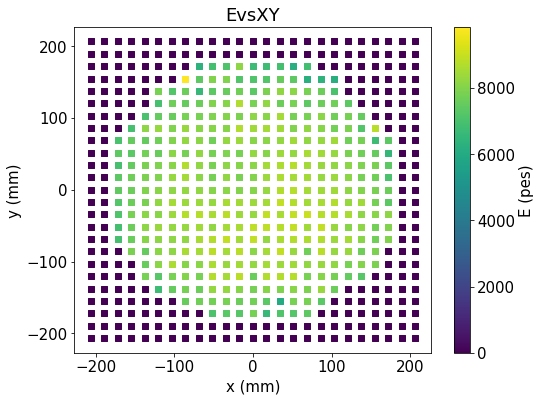

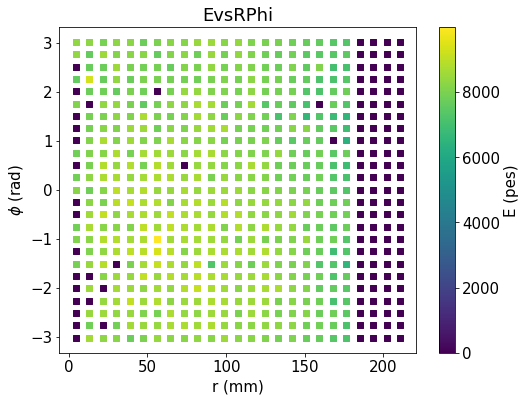

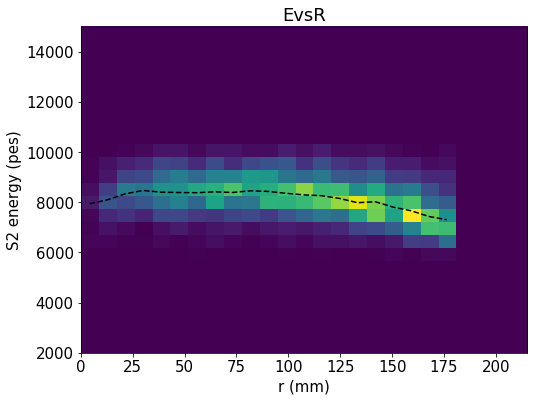

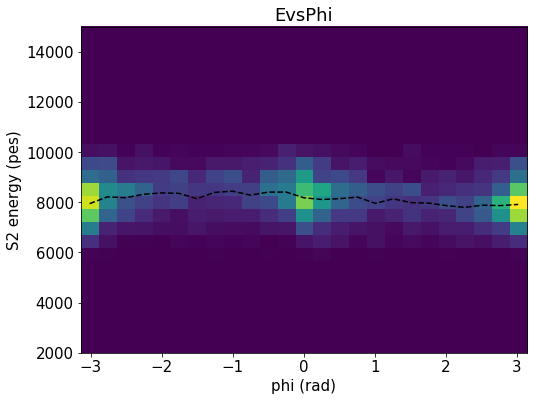

In [42]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  XRrange

E = XR.S2e * zcorr(XR.Z)

pf, _, cb = profile_and_scatter(XR.X, XR.Y, E, (25, 25), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (25, 25), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (25, 25), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 25, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (25, 25), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 25, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


# Correction by attachment and position

[  5.41337088e+05   7.97804149e+03   5.10565771e+02   4.27148016e+04
   9.24764062e+03   2.99137530e+02]


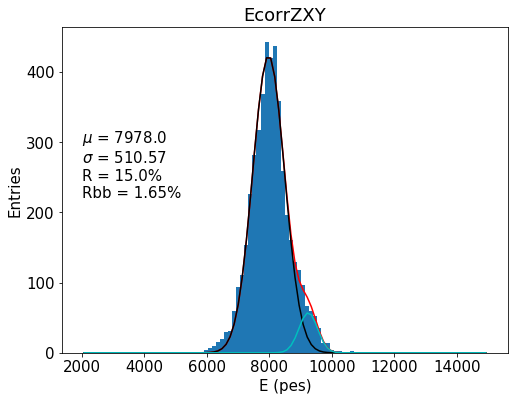

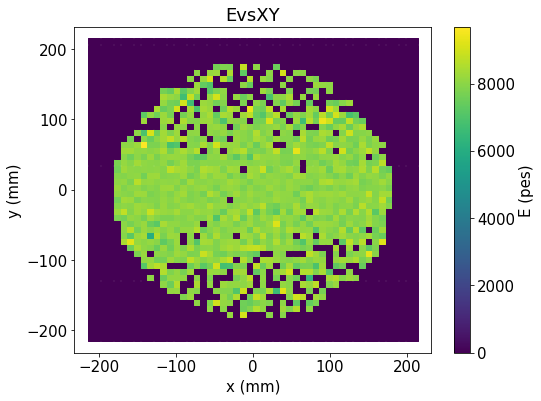

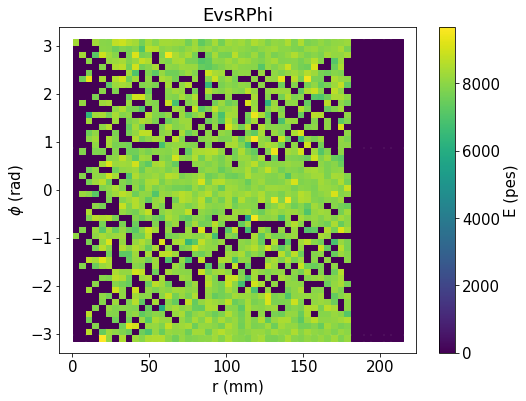

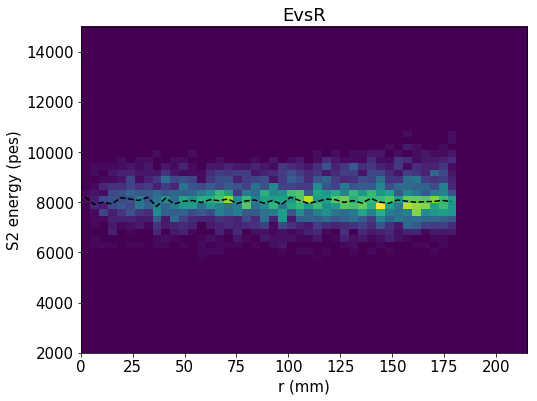

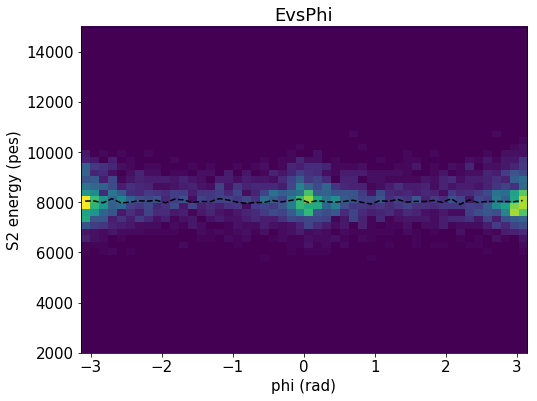

In [43]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  XRrange

E  = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values)

y, x, _ = hist(E, 100, Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3,  9200, 200
low  =  10, 7000,  50,  10,  9000, 100
upp  = 5e6, 8200, 800, 5e5, 10200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = profile_and_scatter(XR.X, XR.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")


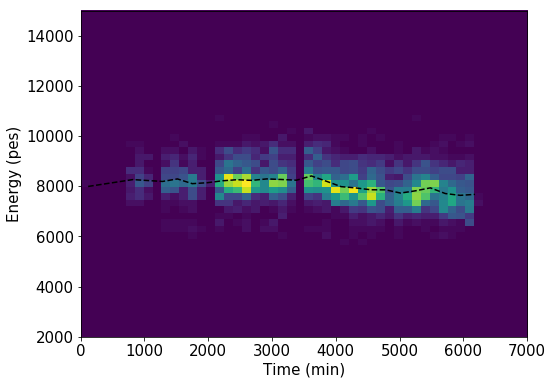

In [54]:
E = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values)
T = (XR.time - np.min(XR.time))/60

Erange = XRrange
Trange = 0, 7000

hist2d(T, E, (50, 50), range=(Trange, Erange))

x, y, _ = fitf.profileX(T, E, 30, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")

def get_timecorr(T, E):
    eref = np.max(E)
    def timecorr(t):
        dt = np.abs(t[:, np.newaxis]-T)
        return eref / E[np.apply_along_axis(np.argmin, 1, dt)]
    return timecorr
tcorr = get_timecorr(x, y)

[  6.07435380e+05   8.27439599e+03   4.17172782e+02   1.05079043e+05
   9.37514232e+03   3.02730674e+02]


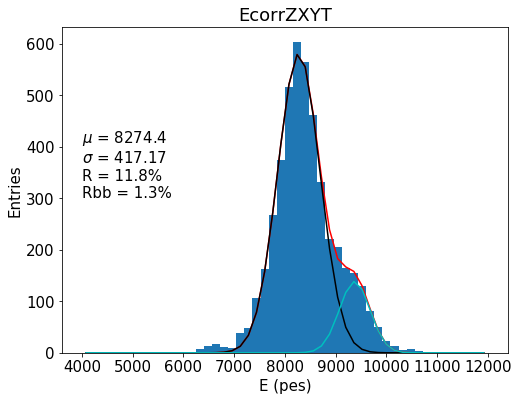

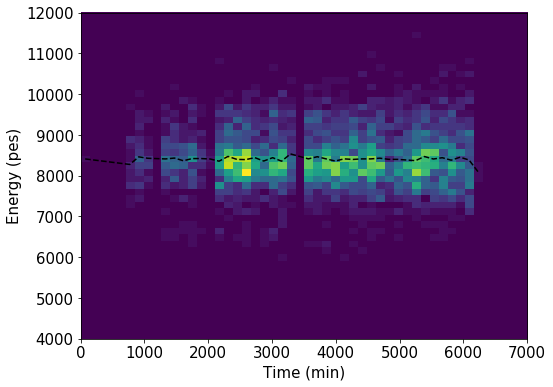

In [62]:
T = (XR.time - np.min(XR.time))/60
E = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values) * tcorr(T)

Trange = 0, 7000
Erange = 4e3, 12e3

y, x, _ = hist(E, 50, Erange)

x = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 8500, 100, 1e3,  9200, 200
low  =  10, 8000,  50,  10,  9000, 100
upp  = 5e6, 9200, 800, 5e5, 10200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))
labels("E (pes)", "Entries")
save("EcorrZXYT")

hist2d(T, E, (50, 50), range=(Trange, Erange))
x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")


In [63]:
PErange = 80e3, 200e3
PE = full[coref.in_range(full.S2e, 80e3, 120e3)]


[  1.37329052e+07   1.36385606e+05   9.73182613e+03] (16.768478767876978, 7.6456282220537242)


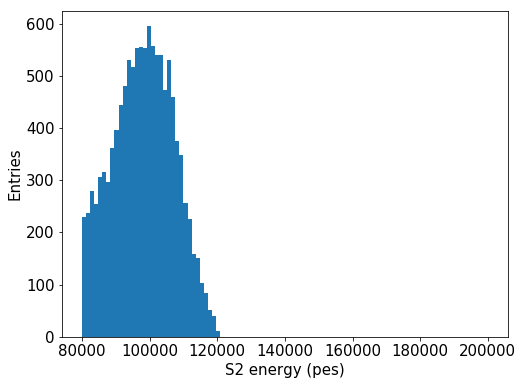

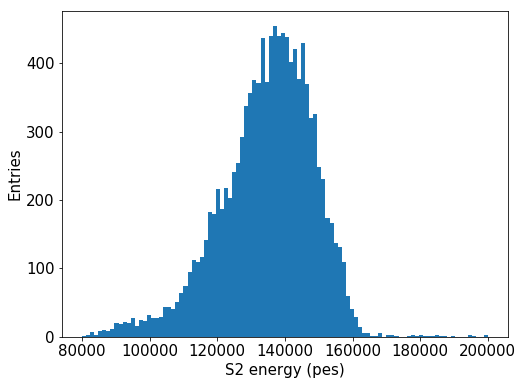

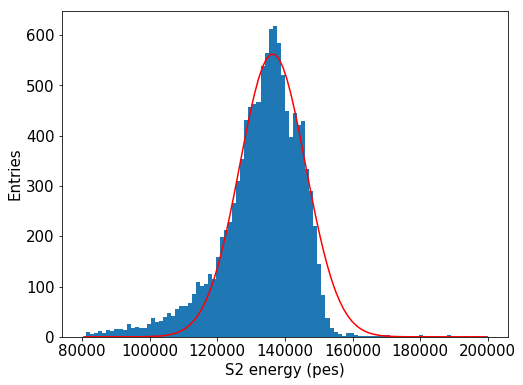

In [64]:
hist(PE.S2e, 100, PErange)
labels("S2 energy (pes)", "Entries")

hist(PE.S2e * zcorr(PE.Z), 100, PErange)
labels("S2 energy (pes)", "Entries")

y, x, _ =\
hist(PE.S2e * zcorr(PE.Z) * xycorr(PE.X.values, PE.Y.values), 100, PErange)
x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e6, 140e3, 1e4), fit_range=(120e3, 150e3))
plt.plot(x, f.fn(x), "r-")
print(f.values, reso(f.values, 511))
labels("S2 energy (pes)", "Entries")

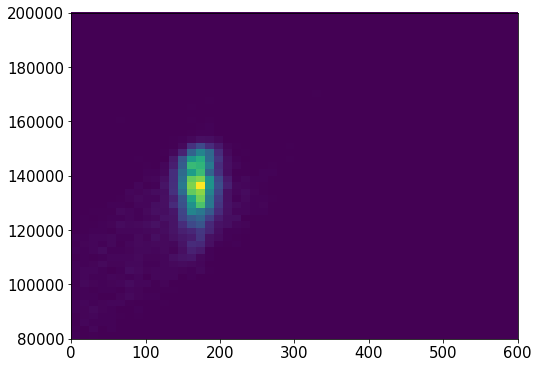

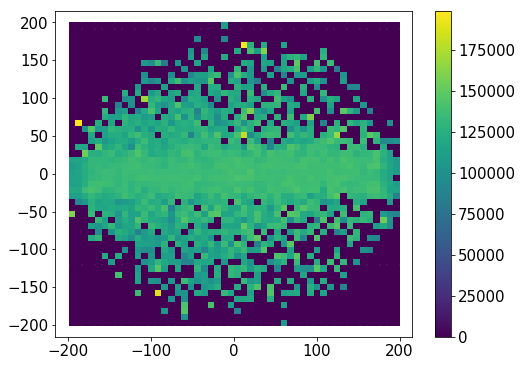

In [65]:
E = PE.S2e.values * zcorr(PE.Z.values) * xycorr(PE.X.values, PE.Y.values)
sel = coref.in_range(E, *PErange)
hist2d(PE.Z.values[sel], E[sel], 50, (zrange, PErange))
profile_and_scatter(PE.X.values[sel], PE.Y.values[sel], E[sel], (50, 50), xrange=(-200, 200), yrange=(-200, 200));

In [66]:
xycorr_old = dstf.load_xy_corrections("/Users/Gonzalo/github/NEXTdata/Na22/run3614.corr")

/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:102: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(np.ma.masked_invalid((fitx - y)**2/y))


[  9.63393931e-11   1.40000000e+05   1.00000000e+04] (16.785714319822215, 7.6534868134142968)


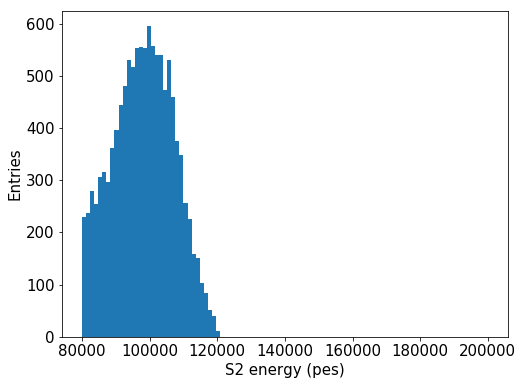

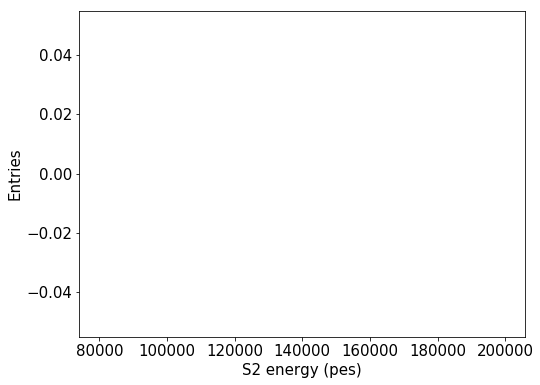

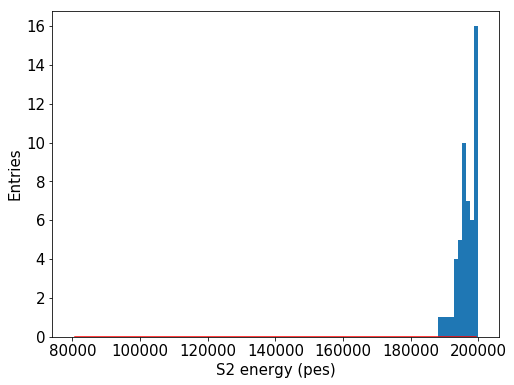

In [67]:
hist(PE.S2e, 100, PErange)
labels("S2 energy (pes)", "Entries")

hist(PE.S2e * zcorr(PE.Z.values)[0], 100, PErange)
labels("S2 energy (pes)", "Entries")

y, x, _ = \
hist(PE.S2e * zcorr(PE.Z.values)[0] * xycorr_old(PE.X.values, PE.Y.values)[0], 100, PErange)
x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e6, 140e3, 1e4), fit_range=(120e3, 150e3))
plt.plot(x, f.fn(x), "r-")
print(f.values, reso(f.values, 511))
labels("S2 energy (pes)", "Entries")

/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:102: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(np.ma.masked_invalid((fitx - y)**2/y))


[ 934816.02662634    6671.06914676    1576.2596834 ] (55.526485702586207, 6.0933356794483569)


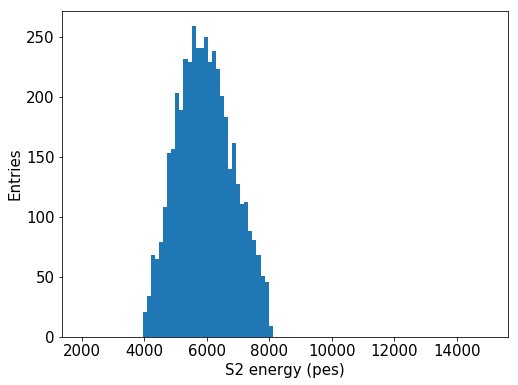

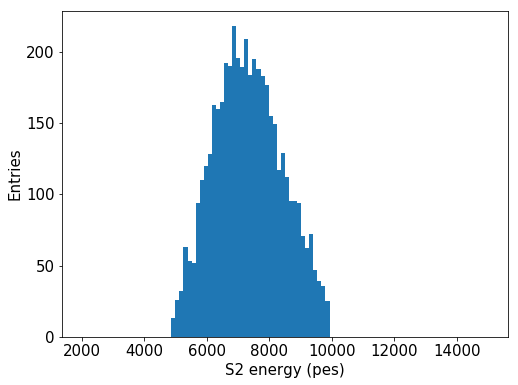

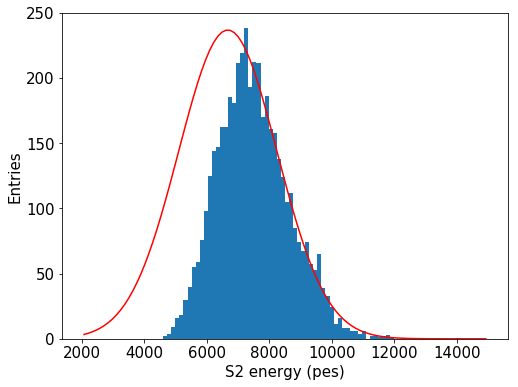

In [68]:
hist(XR.S2e, 100, XRrange)
labels("S2 energy (pes)", "Entries")

hist(XR.S2e * zcorr(XR.Z.values)[0], 100, XRrange)
labels("S2 energy (pes)", "Entries")

y, x, _ = \
hist(XR.S2e * zcorr(XR.Z.values)[0] * xycorr_old(XR.X.values, XR.Y.values)[0], 100, XRrange)
x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e6, 10e3, 1e2), fit_range=(8e3, 12e3))
plt.plot(x, f.fn(x), "r-")
print(f.values, reso(f.values, 29.6))
labels("S2 energy (pes)", "Entries")